# baby names Ireland

https://www.cso.ie/en/interactivezone/visualisationtools/babynamesofireland/

In [5]:
import pandas as pd
import pylab as plt
import numpy as np
import seaborn as sns
import matplotlib as mpl
import pylab as plt
import matplotlib.dates as mdates

In [162]:
years = range(1980,2020)

In [304]:
girls=[]
for y in years:
    df=pd.read_csv('Top Girls Names %s. Source CSO Ireland.csv' %y)
    df['year']=y
    girls.append(df)
girls = pd.concat(girls)
girls.to_csv('girls_names_cso_ireland.csv',index=False)

In [305]:
X = pd.pivot_table(girls,index='Name',columns='year',values='Number of Births')
X.mean(1).sort_values()
X = X.reindex(X.mean(1).sort_values(ascending=False).index)
xnorm = (X-X.min())/(X.max()-X.min())

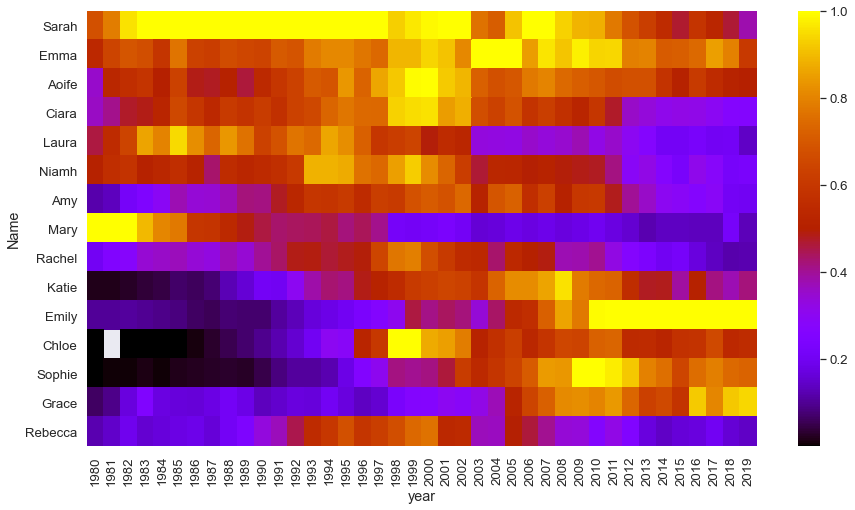

In [306]:
sns.set(font_scale=1.2)
plt.figure(figsize=(15,8))
sns.heatmap(xnorm[:15],cmap='gnuplot')
plt.savefig('top_girls_names_heatmap.png',dpi=150)

<ipython-input-310-2b6f5060e1e7>:26: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.w_xaxis.set_ticklabels(S.columns)


[Text(0.5, 0, 'Amy'),
 Text(1.5, 0, 'Aoife'),
 Text(2.5, 0, 'Ciara'),
 Text(3.5, 0, 'Emma'),
 Text(4.5, 0, 'Laura'),
 Text(5.5, 0, 'Mary'),
 Text(6.5, 0, 'Niamh'),
 Text(7.5, 0, 'Rachel'),
 Text(8.5, 0, 'Sarah')]

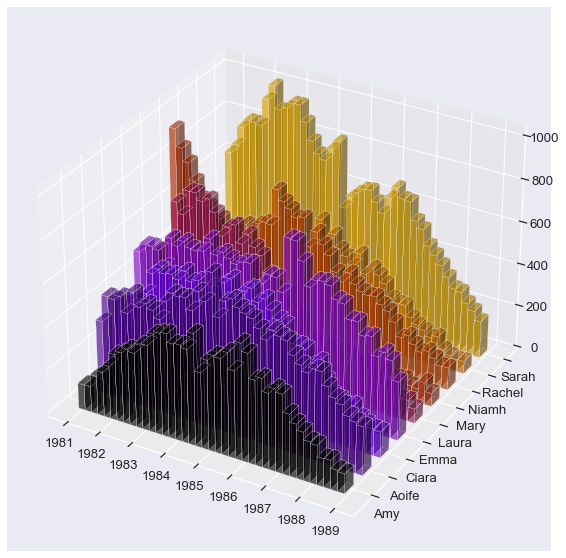

In [310]:
fig = plt.figure(figsize=(30, 10))
ax = fig.add_subplot(121, projection='3d')
S = X[:9].sort_index()
# fake data
ypos = np.arange(len(S.index))
xpos = range(len(S.columns))
_x = np.arange(4)
_y = np.arange(5)
_xx, _yy = np.meshgrid(xpos, ypos)
x, y = _xx.ravel(), _yy.ravel()

top = S.values.ravel()

colors=[]
cmap=plt.cm.get_cmap('gnuplot')
clrs = [cmap(float(i)/len(ypos)) for i in ypos]
for i in ypos:    
    c = [clrs[i] for n in xpos]
    colors.extend(c)
    
bottom = np.zeros_like(top)
width = 1
depth = .5
ax.bar3d(x, y, bottom, width, depth, top, shade=True, alpha=0.4, color=colors,lw=.2)
ax.set_yticks(ypos+0.5)
ax.w_xaxis.set_ticklabels(S.columns)
ax.w_yaxis.set_ticklabels(S.index)

<AxesSubplot:xlabel='year'>

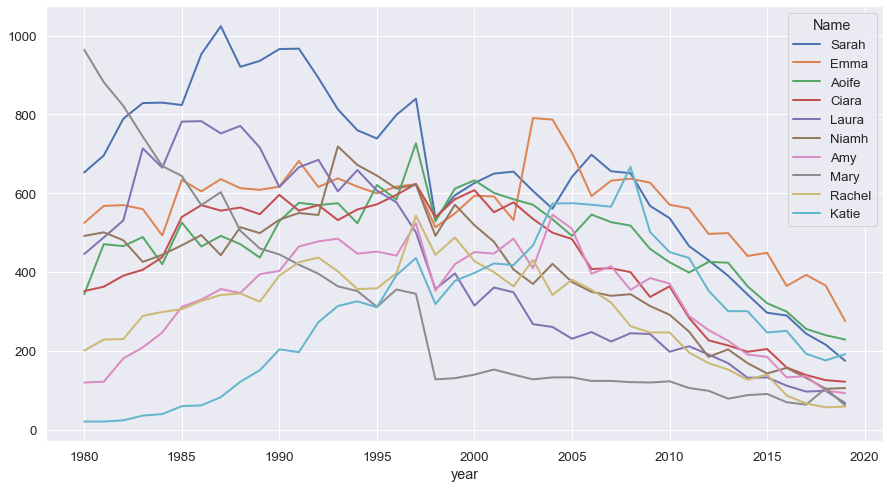

In [312]:
X[:10].T.plot(lw=2,figsize=(15,8))

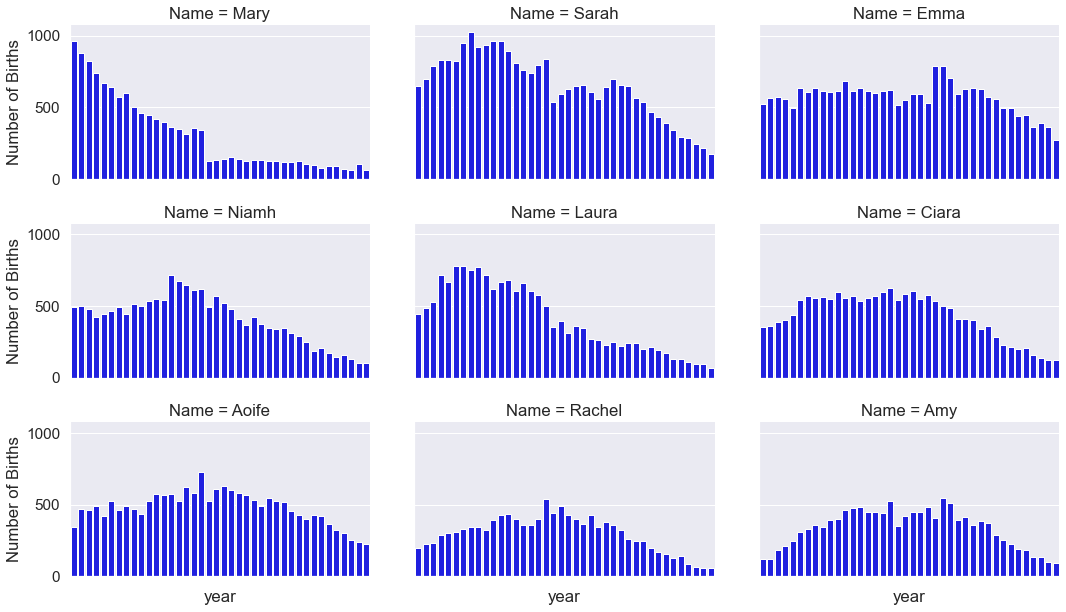

In [313]:
sns.set(font_scale=1.4)
top = X[:9].index
m = girls[girls.Name.isin(top)]
fg=sns.catplot(data=m,x='year',y='Number of Births',col='Name',col_wrap=3,kind='bar',height=3,aspect=1.7,color='blue')
for axes in fg.axes.flat:
    axes.set_xticklabels([])
fg.savefig('top_girls_names_trends.png',dpi=150)